In [1]:
import matplotlib.pyplot as plt
import pandas
pandas.plotting.register_matplotlib_converters()
import numpy
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import joblib

In [2]:
def graphicplot(data, x_label, y_label, title, filename):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(data, alpha=0.70, )
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend(['radiasi'])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show
    plt.savefig(filename)

def graphicplotxy(x, y, x_label, y_label, title, filename):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x, y, alpha=0.70, )
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend(['radiasi'])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show
    plt.savefig(filename)

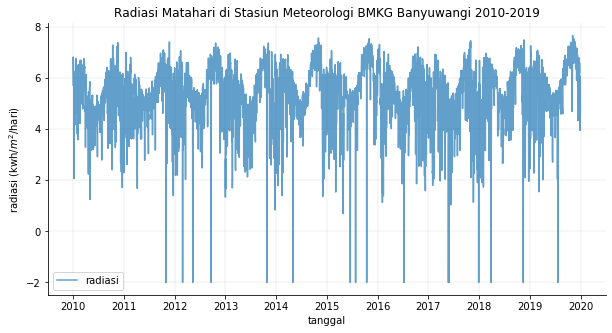

In [4]:
x_label = 'tanggal'
y_label = 'radiasi (kwh/$m^2$/hari)'
title = 'Radiasi Matahari di Stasiun Meteorologi BMKG Banyuwangi 2010-2019'

# Pengumpulan Data
#data mentah
data_radiasi_mentah = pandas.read_csv('POWER_SinglePoint_Daily_20100101_20191231_08d21S_114d36E_665c3f42.csv', header=10, parse_dates=[[2,3,4]], index_col=0, na_values='-999')

data_radiasi_mentah = data_radiasi_mentah.fillna(-2)
graphicplot(data_radiasi_mentah.ALLSKY_SFC_SW_DWN, x_label, y_label, title, 'data_mentah.png')


(5.34, 7.67, 0.69)

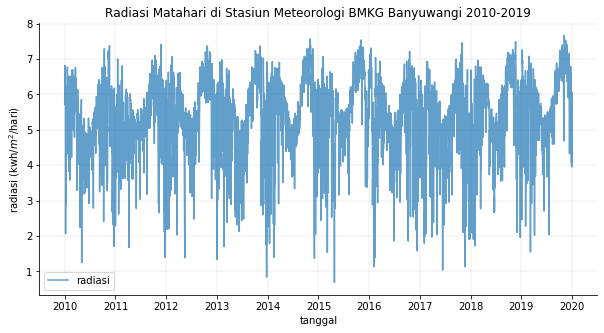

In [5]:
#Pra Proses Data (a. Eliminasi Data Kosong)
data_tereliminasi = data_radiasi_mentah[data_radiasi_mentah.ALLSKY_SFC_SW_DWN != -2]
graphicplot(data_tereliminasi.ALLSKY_SFC_SW_DWN, x_label, y_label, title, 'data_tereliminasi.png') #mean
round(data_tereliminasi.ALLSKY_SFC_SW_DWN.sum()/len(data_tereliminasi.ALLSKY_SFC_SW_DWN), 2), max(data_tereliminasi.ALLSKY_SFC_SW_DWN), min(data_tereliminasi.ALLSKY_SFC_SW_DWN)

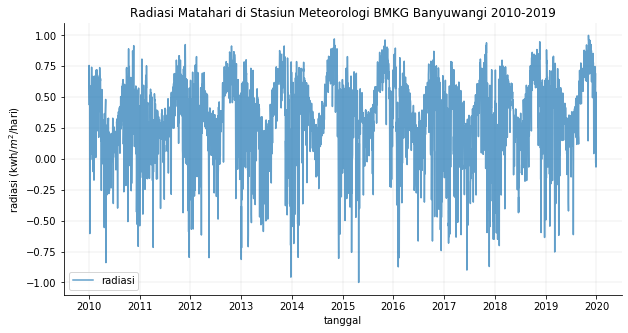

In [6]:
#Pra Proses Data (b. Normalisasi)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(data_tereliminasi[['ALLSKY_SFC_SW_DWN']])

joblib.dump(scaler, "scaler.gz")
data_terskala = scaler.transform(data_tereliminasi[['ALLSKY_SFC_SW_DWN']])

graphicplotxy(data_radiasi_mentah[data_radiasi_mentah.ALLSKY_SFC_SW_DWN != -2].index, data_terskala, x_label, y_label, title, 'data_terskala.png')

In [7]:
#Pra Proses Data (c. pembagian set latih dan set uji)
n_train = len(data_tereliminasi.loc['2010-01-01':'2016-12-31'])
set_latih, set_uji = data_terskala[0:n_train], data_terskala[n_train:]
numpy.savetxt('set_latih.csv', set_latih, delimiter=',')
numpy.savetxt('set_uji.csv', set_uji, delimiter=',')

In [8]:
index_set_latih = data_tereliminasi.index[0:n_train]
df_set_latih = pandas.DataFrame(data=scaler.inverse_transform(set_latih), index=index_set_latih, columns=["set_latih"], copy=False)

In [10]:
index_set_uji = data_tereliminasi.index[n_train:]
df_set_uji = pandas.DataFrame(data=scaler.inverse_transform(set_uji), index=index_set_uji, columns=["set_uji"], copy=False)

In [15]:
df_set_latih.to_csv("df_set_latih.csv")
df_set_uji.to_csv("df_set_uji.csv")

In [16]:
type(data_terskala)

numpy.ndarray

In [9]:
df_set_latih

,set_latih
YEAR_MO_DY,
2010-01-01,5.72
2010-01-02,6.82
2010-01-03,6.62
2010-01-04,6.23
2010-01-05,5.75
...,...
2016-12-27,5.93
2016-12-28,4.32
2016-12-29,3.83


In [12]:
df_set_uji

,set_uji
YEAR_MO_DY,
2017-01-01,5.82
2017-01-02,3.65
2017-01-03,4.58
2017-01-04,6.08
2017-01-05,5.64
...,...
2019-12-27,4.06
2019-12-28,5.61
2019-12-29,3.95
